---

[![Abrir no Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ppestana-supervisor/PDI_python/blob/main/topico2/Topico2.ipynb)

> **Nota importante**
>
> Este notebook é carregado diretamente a partir do repositório oficial no GitHub e é apenas para **leitura**.  
> As alterações **não ficam guardadas**.
>
> Para guardar uma versão pessoal:
> - No Colab, ir a **Ficheiro → Guardar uma cópia no Drive**.  
> - A cópia ficará disponível em `O meu Drive / Colab Notebooks`.
>
> Para colaboração:
> - Abrir a versão pessoal no Google Drive.  
> - Clicar em **Partilhar** → **Qualquer pessoa com o link pode editar** (ou adicionar os colegas manualmente).  
> - A partir daí, todos podem editar em tempo real, como num Google Docs.
>
> Para guardar resultados (imagens, ficheiros, etc.) no  Drive:
> ```python
> from google.colab import drive
> drive.mount('/content/drive')
> ```
> Depois gravar, por exemplo, em:
> ```python
> img.save('/content/drive/MyDrive/PDI_outputs/resultado.png')
> ```

---

In [ ]:
### !!! Executar esta célula primeiro, se dentro do Colab
# Quando dentro do Colab, clonar o repositório completo para garantir acesso à pasta de imagens
!git clone https://github.com/ppestana-supervisor/PDI_python.git
%cd PDI_python/topico2

# 1. Fundamentos da imagem e do processamento em Python

Este tópico introduz os fundamentos da imagem digital e o modo como estas podem ser representadas e manipuladas em Python.  
Explora-se a estrutura matricial das imagens RGB, a correspondência entre o modelo algébrico (tensores em `numpy`) e o modelo físico (ficheiros gráficos como BMP), e as primeiras operações de visualização e persistência.  
A abordagem combina leitura conceptual com prática programática, recorrendo a um pequeno conjunto de bibliotecas essenciais:

- **NumPy** — manipulação matricial e operações numéricas sobre pixeis.  
- **Matplotlib** — visualização e representação gráfica das imagens.  
- **Pillow (PIL)** — leitura e escrita de ficheiros de imagem em vários formatos.  
- **Struct** — interpretação de bytes e análise do cabeçalho binário de ficheiros BMP.  
- **Scikit-image (exposure)** — transformações de intensidade e processamento de contraste.

Estas ferramentas permitem compreender a imagem digital como um objeto simultaneamente **matemático** (tensor tridimensional) e **físico** (sequência de bytes com estrutura definida).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import struct
from skimage import exposure
from matplotlib import colors

## 1.1 Estrutura algébrica de uma imagem RGB em `numpy`

Nesta célula vamos construir explicitamente uma **imagem 3×3** para compreender a sua **estrutura matricial**.

Devemos pensar numa imagem digital como uma matriz de linhas por colunas que forma uma coleção de pixels, cada um dos quais definido pela sua cor. Inicialemente vamos considerar que a cor é definida num formato **R**ed **G**reen and **B**lue (**RGB**), três canais de cor, em que cada canal é representado por 8 bits, variando em intensidade de 0 a 255.

### 1.1.1. Criação da matriz nula

Em `numpy`, uma imagem a cores pode ser representada como um **tensor tridimensional**:  

$$
\text{img} \in \mathbb{N}_0^{H \times W \times 3}
$$

onde:
- \( H \) é o número de **linhas (rows)** → direção vertical,
- \( W \) é o número de **colunas (columns)** → direção horizontal,
- o último eixo (de dimensão 3) representa os **canais de cor** \([R, G, B]\).

Criamos então uma matriz de zeros (tudo preto):

`img = np.zeros((3, 3, 3), dtype=np.uint8)`

### 1.1.2 Definição de alguns pixels

O acesso a um pixel individual é feito por:
$$
\text{img}[y, x] = [R, G, B]
$$

Assim, ao definirmos:
    
`img[1, 1] = [255, 255, 255]`

`img[2, 2] = [255, 255, 255]`

estamos a alterar dois vetores-pixel:

$$
\begin{align*}
\text{img}[1,1,:] &= [255, 255, 255] \\
\text{img}[2,2,:] &= [255, 255, 255]
\end{align*}
$$

ou seja, o pixel central [1,1,:] e o canto inferior direito [2,2,:] passam a brancos
((R=G=B=255)). Encoraja-se que o estudante altere os valores na matriz para criar um entendimento mais tangível da estrutura.

### 1.1.3 Estrutura matricial global

O tensor tem a forma:

$$
\text{img} =
\begin{bmatrix}
[0,0,0] & [0,0,0] & [0,0,0] \\
[0,0,0] & [255,255,255] & [0,0,0] \\
[0,0,0] & [0,0,0] & [255,255,255]
\end{bmatrix}
$$

Cada elemento ([R,G,B]) é um vetor no espaço das cores.

A forma e o tipo de dados são:
    
`print(img.shape)  # (3, 3, 3)`

`print(img.dtype)  # uint8`


### 1.1.4 Separação dos canais de cor

Podemos obter as três “fatias” 2D correspondentes a cada canal:
    
`R = img[:, :, 0] `

`G = img[:, :, 1] `

`B = img[:, :, 2] `

Ou seja:

	•	(R_{y,x}) → intensidade do vermelho no pixel ((y,x))
    
	•	(G_{y,x}) → intensidade do verde
    
	•	(B_{y,x}) → intensidade do azul

As três matrizes são:

$$
R =
\begin{bmatrix}
0 & 0 & 0 \
0 & 255 & 0 \
0 & 0 & 255
\end{bmatrix}, \quad
G =
\begin{bmatrix}
0 & 0 & 0 \
0 & 255 & 0 \
0 & 0 & 255
\end{bmatrix}, \quad
B =
\begin{bmatrix}
0 & 0 & 0 \
0 & 255 & 0 \
0 & 0 & 255
\end{bmatrix}
$$


### 1.1.5 Interpretação algébrica final

Cada pixel pode ser visto como um vetor coluna no espaço tridimensional das cores:

$$
\mathbf{p}{y,x} =
\begin{bmatrix}
R_{y,x} 
G_{y,x}
B_{y,x}
\end{bmatrix}
\in \mathbb{R}^3
$$

e a imagem completa é um campo discreto de vetores RGB sobre a grelha 2D:

$$
\text{img} : {0,\ldots,H-1} \times {0,\ldots,W-1} \to [0,255]^3
$$

| Conceito | Representação | Interpretação |
|-----------|----------------|---------------|
| **pixel** | vetor `[R, G, B]` | cor num ponto *(linha, coluna)* |
| **linha** | vetor de pixels | variação horizontal |
| **canal** | matriz 2D | intensidade de uma componente |
| **imagem** | tensor 3D | composição RGB completa |


> **Nota importante — Convenções de indexação em imagem**
>
> Em `numpy`, tal como em álgebra linear, a indexação segue a forma matricial:
> \[
> \text{img}[y, x] = \text{img}[\text{linha}, \text{coluna}]
> \]
>
> O **primeiro índice** percorre as **linhas** (eixo vertical) e o **segundo índice** percorre as **colunas** (eixo horizontal).  
> Por isso, a estrutura interna das imagens em `numpy` é `(height, width, channels)`, e não `(width, height, channels)`.
>
> Esta convenção difere da das **coordenadas cartesianas** usadas em gráficos, onde o ponto é dado por `(x, y)` e o eixo Y cresce de baixo para cima.  
> Nas imagens digitais, o eixo Y cresce **de cima para baixo**, e o ponto `(0, 0)` localiza-se **no canto superior esquerdo**.
>
> Assim:
>
> | Contexto | Ordem de índices | Origem | Direção de Y |
> |-----------|------------------|---------|---------------|
> | `numpy` / processamento de imagem | `(y, x)` = `(row, column)` | canto superior esquerdo | ↓ para baixo |
> | coordenadas geométricas / cartesianas | `(x, y)` | canto inferior esquerdo | ↑ para cima |
>
> Esta diferença de convenção é fundamental para evitar erros quando se misturam
> operações matriciais (`numpy`) com transformações geométricas (rotação, translação, etc.)
> ou quando se integram bibliotecas de visualização e processamento (por exemplo, `matplotlib`, `OpenCV`, `scikit-image`).

In [2]:
img = np.zeros((3, 3, 3), dtype=np.uint8)

img[1, 1] = [255, 255, 255]
img[2, 2] = [255, 255, 255]

print("Matriz RGB 3x3 criada:")
print(img)

print("\nDimensões:", img.shape)
print("Tipo de dados:", img.dtype)

print("\nCanal R:")
print(img[:, :, 0])
print("\nCanal G:")
print(img[:, :, 1])
print("\nCanal B:")
print(img[:, :, 2])

Matriz RGB 3x3 criada:
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [255 255 255]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [255 255 255]]]

Dimensões: (3, 3, 3)
Tipo de dados: uint8

Canal R:
[[  0   0   0]
 [  0 255   0]
 [  0   0 255]]

Canal G:
[[  0   0   0]
 [  0 255   0]
 [  0   0 255]]

Canal B:
[[  0   0   0]
 [  0 255   0]
 [  0   0 255]]


## 1.2 Visualização da imagem

Podemos visualizar a matriz RGB diretamente com `matplotlib`.  
A função `imshow()` interpreta automaticamente a última dimensão como canais de cor

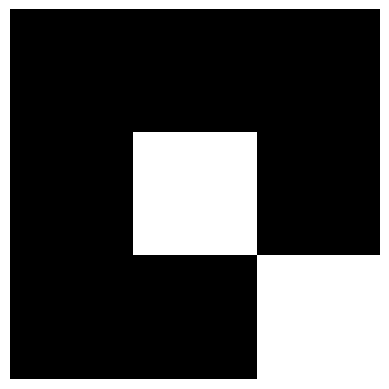

In [26]:
plt.imshow(img)
plt.axis("off")
plt.show()

## 1.3 Da matriz ao ficheiro de imagem: persistência e reversibilidade

Nesta etapa, passamos do **modelo matricial** que representa a imagem na memória  
para uma **representação persistente em disco** — um ficheiro BMP.

A transição é conceptualmente simples mas profundamente significativa:  
o objeto `numpy`, que armazenava valores discretos de intensidade (0–255),  
é convertido num ficheiro onde cada triplo `[R, G, B]` é escrito como **três bytes contíguos**.

O Pillow (`PIL`) executa automaticamente a codificação conforme a especificação BMP:
- insere um **cabeçalho** (54 bytes) com metadados — largura, altura, profundidade e offsets;
- escreve a sequência de bytes **linha a linha** (*row by row*),  
  mas **em ordem invertida verticalmente** (de baixo para cima), tal como define o formato BMP;
- assegura o alinhamento de cada linha a múltiplos de 4 bytes (*padding*).

Ao reabrirmos o ficheiro e reconvertermos para `numpy`, observamos que:
- o **modo** é `RGB`, ou seja, cada pixel tem três canais de 8 bits;
- as **dimensões** coincidem com as da matriz original;
- a **estrutura interna `[R, G, B]`** mantém-se intacta.

Esta operação confirma que o processo  
**memória → ficheiro → memória** é essencialmente **reversível**,  
demonstrando que a matriz inicial contém toda a informação necessária para gerar uma imagem.

Do ponto de vista algébrico, o ficheiro BMP é uma **linearização ordenada** do tensor tridimensional:
cada **pixel** é um vetor de dimensão 3,  
cada **linha** é uma sequência desses vetores,  
e a **imagem** é escrita como a concatenação sucessiva das linhas —  
uma codificação linear do campo discreto $\text{img}[y,x,:]$.

> **Nota sobre convenções de orientação**  
> Embora a imagem em `numpy` siga a convenção matricial `(y, x)`  
> (primeiro índice = linha, segundo = coluna, origem no topo),  
> o formato BMP grava as linhas **de baixo para cima**.  
> Ao reabrir o ficheiro, o `Pillow` corrige automaticamente esta inversão,  
> garantindo que a imagem carregada mantém a mesma orientação da matriz original.

Imagem gravada como 'imgs/ponto_rgb.bmp' (modo RGB, 24 bits).

Modo: RGB
Dimensões: (3, 3)
Formato: BMP


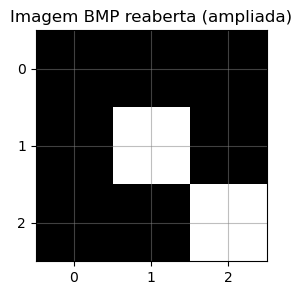


Matriz reaberta (valores RGB):
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [255 255 255]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [255 255 255]]]


In [4]:
img_rgb = Image.fromarray(img)
img_rgb.save('imgs/ponto_rgb.bmp')
print("Imagem gravada como 'imgs/ponto_rgb.bmp' (modo RGB, 24 bits).")

img_loaded = Image.open('imgs/ponto_rgb.bmp')
img_loaded_np = np.array(img_loaded)

print("\nModo:", img_loaded.mode)
print("Dimensões:", img_loaded.size)
print("Formato:", img_loaded.format)

plt.figure(figsize=(3, 3))
plt.imshow(img_loaded, interpolation='nearest')
plt.title("Imagem BMP reaberta (ampliada)")
plt.xticks(range(3))
plt.yticks(range(3))
plt.grid(True, color='gray', alpha=0.5)
plt.show()

print("\nMatriz reaberta (valores RGB):")
print(img_loaded_np)

## 1.4 Leitura binária e reconstrução do ficheiro BMP

Depois de termos confirmado que a biblioteca `Pillow` consegue gravar e reler corretamente o ficheiro BMP, o passo seguinte é compreender **como a informação da imagem está realmente armazenada no disco**.

Uma imagem não é mais do que um **fluxo de bytes com estrutura normalizada**.  
Cada formato (BMP, PNG, JPEG, etc.) define uma forma própria de organizar esses bytes.  
O formato BMP, um dos mais antigos e simples, é ideal para compreender esta relação entre o **modelo matricial** e o **modelo binário**.

### 1.4.1 Estrutura geral de um ficheiro BMP

Um ficheiro BMP contém duas partes principais:

1. **Cabeçalho (Header)** — 54 bytes fixos  
   Contém a informação descritiva do ficheiro (assinatura, tamanho, dimensões, profundidade, etc.).
2. **Dados da imagem (Bitmap Data)** — sequência de bytes RGB,  
   dispostos **linha a linha** (de baixo para cima), com eventual *padding* até múltiplos de 4 bytes.

Em termos esquemáticos:

```
┌───────────────────────────────────────────────┐
│ Cabeçalho (54 bytes)                         │
│  - Assinatura (“BM”)                         │
│  - Tamanho total do ficheiro                 │
│  - Offset onde começam os dados da imagem    │
│  - Largura, altura, bits por pixel           │
│  - Outras informações técnicas               │
├───────────────────────────────────────────────┤
│ Dados da Imagem (Bitmap Data)                │
│  - Linhas de pixels                          │
│  - Cada pixel = 3 bytes (B, G, R)            │
│  - Linhas gravadas de baixo para cima        │
│  - Cada linha alinhada a múltiplos de 4 bytes│
└───────────────────────────────────────────────`
```


### 1.4.2 Leitura do cabeçalho

Ao abrir o ficheiro em modo binário (`'rb'`), lemos os primeiros 54 bytes.  
Cada grupo de bytes corresponde a um campo específico do cabeçalho:

| Campo | Offset (bytes) | Tamanho | Tipo | Descrição |
|--------|----------------|----------|------|------------|
| Assinatura | 0–1 | 2 | texto | Deve conter `"BM"` |
| Tamanho total do ficheiro | 2–5 | 4 | inteiro (`<I`) | Número total de bytes |
| Offset dos dados | 10–13 | 4 | inteiro (`<I`) | Posição onde começam os dados da imagem |
| Largura | 18–21 | 4 | inteiro (`<i`) | Número de colunas (pixels) |
| Altura | 22–25 | 4 | inteiro (`<i`) | Número de linhas (pixels) |
| Bits por pixel | 28–29 | 2 | inteiro (`<H`) | Profundidade de cor (24 → RGB, 8 → indexado) |

O prefixo `<` indica **little endian**, a convenção de ordenação de bytes usada no formato BMP.

Ao imprimir o cabeçalho em hexadecimal, podemos ver os valores tal como estão no disco — uma representação pura da estrutura binária.  
A função `struct.unpack()` converte esses bytes em valores inteiros legíveis.

### 1.4.3 Reconstrução manual da imagem

A partir dos campos de largura, altura e bits por pixel, é possível **reconstruir manualmente a matriz RGB** sem recorrer ao `Pillow`.

1. Calcula-se o tamanho real de cada linha (`row_size`), garantindo que o comprimento seja múltiplo de 4 bytes.  
2. Lê-se cada linha da imagem em sequência, corrigindo a inversão vertical (`np.flipud` ou índice invertido).  
3. Cada pixel é composto por três bytes consecutivos na ordem **B, G, R**.  
4. O resultado é uma matriz tridimensional `height × width × 3`, idêntica à que criámos inicialmente em `numpy`.

Este processo demonstra que o formato BMP é **uma linearização ordenada do tensor tridimensional**:

$$
\text{img}[y,x,:] \;\Rightarrow\; \text{sequência de bytes}\; [B, G, R]
$$

e o ficheiro é, portanto, a concatenação sucessiva das linhas desse tensor.


### 1.4.4 Comparação e validação

Ao comparar a matriz reconstruída manualmente (`img_manual`) com a lida pelo Pillow (`img_loaded`), verificamos:

- As duas matrizes são idênticas (`True` em `np.array_equal`).  
- A imagem reconstruída apresenta os mesmos dois pixels brancos (central e inferior direito).  
- A orientação visual coincide com a da imagem original, pois o Pillow corrige automaticamente a inversão vertical interna do BMP.

A visualização final confirma a **reversibilidade total** entre a estrutura matricial e o ficheiro binário.


### 1.4.5 Síntese conceptual

O estudo binário do BMP evidencia a ligação entre **representação matemática** e **codificação digital**:

| Conceito | Representação | Interpretação |
|-----------|----------------|---------------|
| **Pixel** | vetor `[R, G, B]` | 3 bytes consecutivos em disco |
| **Linha** | sequência de pixels | 3 × largura bytes + *padding* |
| **Imagem** | matriz 2D de vetores RGB | linearização sucessiva das linhas |
| **Cabeçalho** | bloco de metadados fixo | descreve como interpretar os bytes seguintes |

> 💡 **Nota sobre convenções**
>
> Em `numpy`, o primeiro índice (`y`) corresponde à **linha** (vertical)  
> e o segundo (`x`) à **coluna** (horizontal), com origem no **topo esquerdo**.  
> No ficheiro BMP, as linhas são gravadas **de baixo para cima**,  
> mas o Pillow e a reconstrução manual invertem esta ordem ao carregar a imagem,
> garantindo coerência com a convenção matricial.

### 1.4.6 Conclusão

A leitura binária e a reconstrução manual permitem compreender que a imagem digital é simultaneamente:
- um **objeto matemático** (tensor tridimensional discreto),
- e um **objeto físico** (sequência de bytes organizada segundo uma convenção).

Ao dominar esta correspondência, o estudante adquire uma compreensão sólida  
do elo entre a álgebra do processamento digital de imagem e a arquitetura real dos ficheiros gráficos.

Primeiros 54 bytes (cabeçalho BMP):
42 4D 5A 00 00 00 00 00 00 00 36 00 00 00 28 00 00 00 03 00 00 00 03 00 00 00 01 00 18 00 00 00 00 00 24 00 00 00 C4 0E 00 00 C4 0E 00 00 00 00 00 00 00 00 00 00

--- Informação extraída do cabeçalho ---
Assinatura: BM
Tamanho total do ficheiro: 90 bytes
Offset do início dos dados: 54 bytes
Largura: 3 px
Altura: 3 px
Bits por pixel: 24

As matrizes Pillow e manual são idênticas? True


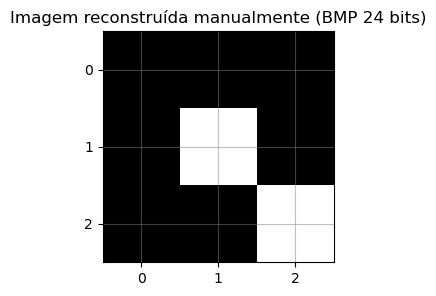

In [5]:
with open('imgs/ponto_rgb.bmp', 'rb') as f:
    header = f.read(54)   # cabeçalho BMP (54 bytes fixos)
    data = f.read()       # dados da imagem (pixels)

print("Primeiros 54 bytes (cabeçalho BMP):")
print(" ".join(f"{b:02X}" for b in header[:54]))

signature = header[0:2].decode('ascii')
file_size = struct.unpack('<I', header[2:6])[0]
data_offset = struct.unpack('<I', header[10:14])[0]
width, height = struct.unpack('<ii', header[18:26])
bits_per_pixel = struct.unpack('<H', header[28:30])[0]

print("\n--- Informação extraída do cabeçalho ---")
print(f"Assinatura: {signature}")
print(f"Tamanho total do ficheiro: {file_size} bytes")
print(f"Offset do início dos dados: {data_offset} bytes")
print(f"Largura: {width} px")
print(f"Altura: {height} px")
print(f"Bits por pixel: {bits_per_pixel}")

row_size = (width * 3 + 3) & ~3   # múltiplo de 4 bytes
padding = row_size - width * 3

img_manual = np.zeros((height, width, 3), dtype=np.uint8)
offset = 0
for y in range(height):
    row = np.frombuffer(data[offset:offset + width * 3], dtype=np.uint8)
    row = row.reshape((width, 3))
    img_manual[height - 1 - y, :, :] = row  # BMP armazena de baixo para cima
    offset += row_size

equal = np.array_equal(img_manual, img_loaded)
print(f"\nAs matrizes Pillow e manual são idênticas? {equal}")

plt.figure(figsize=(3, 3))
plt.imshow(img_manual, interpolation='nearest')
plt.title("Imagem reconstruída manualmente (BMP 24 bits)")
plt.xticks(range(width))
plt.yticks(range(height))
plt.grid(True, color='gray', alpha=0.5)
plt.show()

## 1.5 Leitura de imagens com biblioteca (nível simbólico)

Depois de compreender a estrutura binária de um ficheiro de imagem, passamos agora a um **nível de abstração simbólico**:  
em vez de interpretar bytes, usamos uma biblioteca de alto nível que lê o ficheiro, decodifica-o segundo o formato e devolve diretamente uma **matriz `numpy`**.

### 1.5.1 O papel da biblioteca de leitura

Em Python, o equivalente direto ao `imread` do MATLAB é a biblioteca **Pillow (PIL)**.  
A sua função principal, `Image.open()`, executa de forma transparente todas as operações de leitura:

1. **Abre** o ficheiro e reconhece automaticamente o formato (BMP, PNG, JPEG, TIFF, etc.);  
2. **Decodifica** os bytes conforme o tipo de codificação e profundidade de cor;  
3. **Cria** um objeto `Image` com atributos como `mode` (RGB, RGBA, L) e `size` (largura, altura);  
4. **Converte** esse objeto para uma matriz `numpy` através de `np.array()`,  
   tornando possível o processamento algébrico direto.

O ciclo de trabalho é:

```
Leitura → Representação → Visualização
  │           │               │
  ▼           ▼               ▼
Image.open → np.array → plt.imshow
```

Dimensões: (4024, 6048, 3)
Tipo de dados: uint8


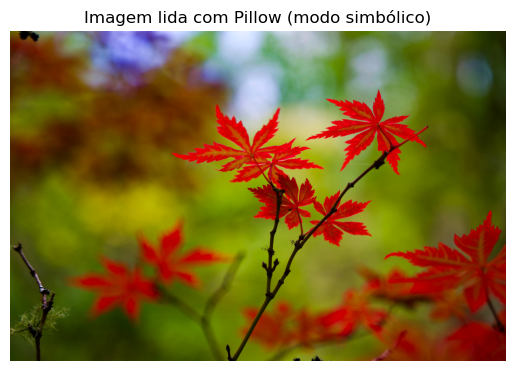

In [6]:
img1 = np.array(Image.open('imgs/maple.tif'))

print("Dimensões:", img1.shape)
print("Tipo de dados:", img1.dtype)

plt.imshow(img1)
plt.title("Imagem lida com Pillow (modo simbólico)")
plt.axis("off")
plt.show()

## 1.6 Imagens em escala de cinzento e observação de sub-regiões

Antes de introduzir as imagens a cores, é útil compreender o funcionamento das imagens com um **único canal de intensidade**.  
Cada pixel é representado por um valor escalar proporcional ao brilho, o que simplifica as operações de análise e visualização.

A conversão de uma imagem RGB para **escala de cinzento** é feita através de uma combinação linear dos três canais, ponderando a contribuição perceptiva de cada cor:

$$
I(x,y) = 0.2989 \, R(x,y) + 0.5870 \, G(x,y) + 0.1140 \, B(x,y)
$$

O resultado é uma **matriz bidimensional** \\( H \times W \\), onde cada elemento \\( I_{y,x} \\) corresponde à intensidade luminosa de um pixel.

Para observar numericamente a estrutura local da imagem, podemos selecionar uma pequena submatriz, por exemplo uma região de 6×6 pixeis.  
Ao ampliá-la visualmente, cada elemento escalar torna-se num bloco proporcional à sua intensidade, permitindo relacionar o valor numérico com a perceção visual do brilho.

Esta operação demonstra que uma imagem a cinzento é, em essência, uma função discreta:

$$
I : \{0,\ldots,H-1\} \times \{0,\ldots,W-1\} \to [0,255]
$$

onde cada par de índices \\((y, x)\\) identifica a posição de um pixel e o valor associado representa a energia luminosa nesse ponto.

img1: (4024, 6048) uint8
Matriz 6x6 pixeis (valores de intensidade):
[[59 59 60 60 58 58]
 [59 59 59 59 59 58]
 [59 59 59 59 60 60]
 [58 58 60 60 60 60]
 [58 57 59 61 60 59]
 [57 58 57 59 59 59]]


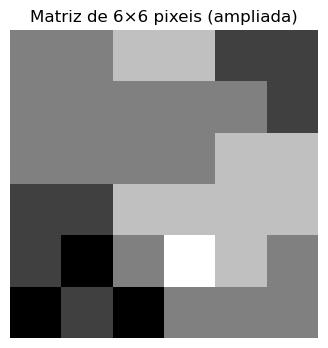

In [27]:
img1 = np.array(Image.open('imgs/maple.tif').convert('L'))
if img1.ndim == 3:
    img1 = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

print("img1:", img1.shape, img1.dtype)

img1piece = img1[200:206, 300:306]  # 6x6 blocos, índice final exclusivo
print("Matriz 6x6 pixeis (valores de intensidade):")
print(np.round(img1piece, 1))

plt.figure(figsize=(4, 4))
plt.imshow(img1piece, cmap='gray', interpolation='nearest')
plt.title('Matriz de 6×6 pixeis (ampliada)')
plt.axis('off')
plt.show()

## 1.7 Indexação matricial e extração de regiões da imagem

Os valores de intensidade representam níveis de cinzento entre o preto (0) e o branco (255).  
A imagem é uma matriz bidimensional indexada a partir do **canto superior esquerdo**,  
onde o primeiro índice corresponde às **linhas (eixo vertical)** e o segundo às **colunas (eixo horizontal)**:

$$
I[y, x] \quad \text{com } y \to \text{para baixo}, \; x \to \text{para a direita.}
$$

Esta convenção difere das coordenadas cartesianas usuais,  
em que o eixo vertical cresce para cima. Em processamento digital de imagem,  
a indexação segue a lógica matricial da álgebra linear.

Podemos explorar esta estrutura através de **fatias matriciais (slices)**,  
selecionando regiões ou tiras da imagem:

- **Zona superior-esquerda:** metade da imagem em ambas as dimensões;  
- **Detalhe da folha à direita:** recorte de uma região específica (linhas 120–180, colunas 400–490);  
- **Fatia vertical:** três primeiras colunas da esquerda;  
- **Tira horizontal inferior:** linhas 380–400 de toda a largura.

Cada operação de fatiamento corresponde a uma restrição nos índices  
e ilustra como as matrizes bidimensionais podem ser manipuladas geometricamente  
sem alterar o conteúdo dos pixeis — apenas o domínio espacial de observação.

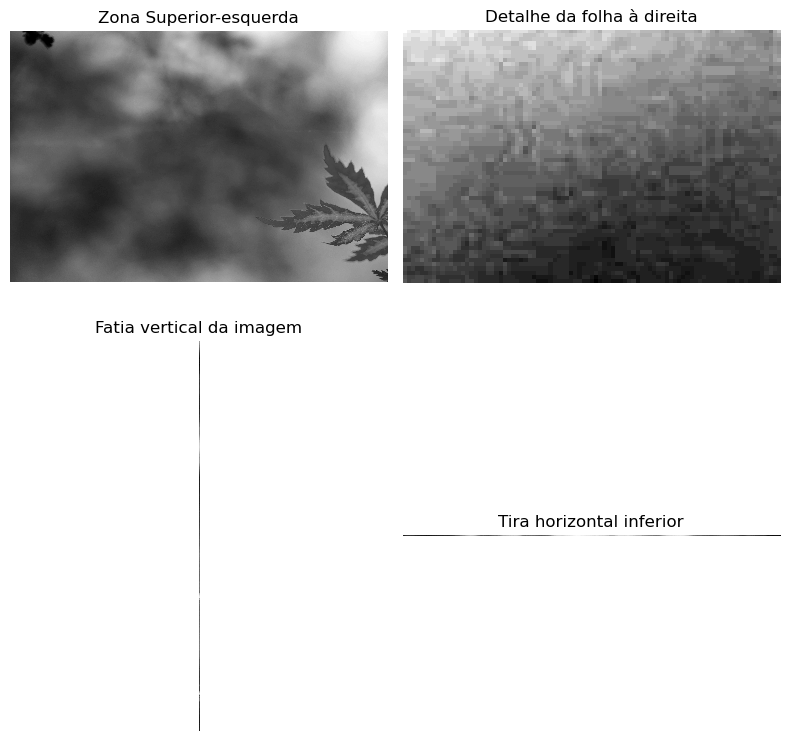

In [28]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(img1[: img1.shape[0] // 2, : img1.shape[1] // 2],
           cmap='gray', interpolation='nearest')
plt.title('Zona Superior-esquerda')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img1[120:181, 400:491], cmap='gray', interpolation='nearest')
plt.title('Detalhe da folha à direita')
plt.axis('off')

# Fatia vertical da esquerda
plt.subplot(2, 2, 3)
plt.imshow(img1[:, :3], cmap='gray', interpolation='nearest')
plt.title('Fatia vertical da imagem')
plt.axis('off')

# Tira horizontal inferior
plt.subplot(2, 2, 4)
plt.imshow(img1[380:401, :], cmap='gray', interpolation='nearest')
plt.title('Tira horizontal inferior')
plt.axis('off')

plt.tight_layout()
plt.show()

## 1.8 Formatos de imagem suportados

A leitura de imagens em Python é transparente para a maioria dos formatos comuns —  
`Pillow` reconhece automaticamente a codificação e devolve o objeto correspondente.  
Assim como o `imread` do MATLAB, o `Image.open()` aceita ficheiros **TIFF**, **JPEG**, **PNG**, **BMP**, **GIF**, entre outros.

Exemplo de ficheiros suportados:

| Extensão | Formato | Descrição |
|-----------|----------|-----------|
| `.tif`, `.tiff` | **TIFF** | Suporta múltiplas camadas, 8/16/32 bits |
| `.jpg`, `.jpeg` | **JPEG** | Compressão com perdas, formato fotográfico |
| `.png` | **PNG** | Compressão sem perdas, suporta transparência |
| `.bmp` | **BMP** | Mapa de bits simples, ideal para estudo estrutural |
| `.gif` | **GIF** | Paleta indexada, suporta animação |
| `.webp` | **WebP** | Compressão moderna com ou sem perdas |
| `.ico` | **ICO** | Ícones de aplicações |

A leitura é feita com:
```
from PIL import Image
img = Image.open('ficheiro.ext')
```

## 1.9 Escrita de ficheiros e escalas de visualização

A função `imwrite` do MATLAB tem como equivalente em Python o método `save()` do Pillow,  
que permite gravar qualquer matriz `numpy` como imagem num formato padrão.

Ao reler o ficheiro com Image.open(), os valores numéricos (0–255)
continuam a representar níveis de cinzento: 0 → preto, 255 → branco.

No MATLAB, a função imshow pode receber um intervalo explícito de visualização,
alterando apenas a forma como a imagem é mapeada para o ecrã,
sem modificar os dados originais.
Em Python, o mesmo é obtido com os parâmetros vmin e vmax de imshow():

| Configuração | Parâmetros | Efeito |
|---------------|-------------|---------|
| **Normal** | sem `vmin` / `vmax` | mostra os valores tal como estão |
| **Truncado** | `vmin=50`, `vmax=100` | comprime a escala entre 50–100; realça contraste nesse intervalo |
| **Normalizado** | `vmin=im.min()`, `vmax=im.max()` | ajusta automaticamente a gama 0–255 |

Estas opções são estratégias de visualização,
não de processamento — a matriz de pixeis mantém-se inalterada.
A diferença reside apenas no mapeamento entre valores de intensidade
e níveis de brilho exibidos no monitor.

img3: (403, 605) uint8


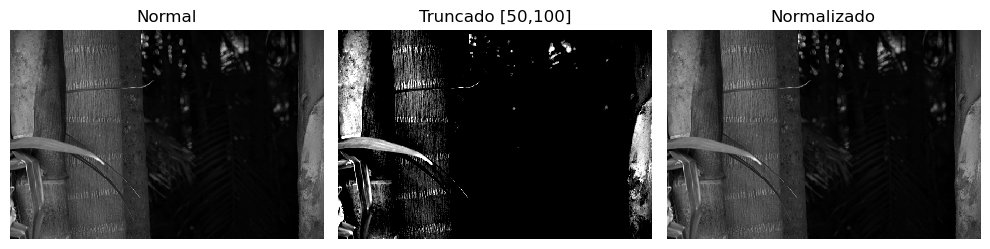

In [9]:
img2 = np.array(Image.open('imgs/tronco.tif'))

img2_bw = Image.fromarray(img2.astype(np.uint8))
img2_bw.save('imgs/tronco_bw.tif')

img3 = np.array(Image.open('imgs/tronco_bw.tif'))
print("img3:", img3.shape, img3.dtype)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(img3, cmap='gray', interpolation='nearest')
plt.title('Normal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img3, cmap='gray', vmin=50, vmax=100, interpolation='nearest')
plt.title('Truncado [50,100]')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray', vmin=img3.min(), vmax=img3.max(), interpolation='nearest')
plt.title('Normalizado')
plt.axis('off')

plt.tight_layout()
plt.show()

## 1.10 Transformações geométricas: inversão de eixos

Para além do recorte por indexação, as transformações geométricas podem ser realizadas
manipulando diretamente os **índices da matriz**.

A expressão MATLAB `end:-1:1` inverte a ordem dos elementos num eixo.
Em Python, a operação equivalente é a **indexação negativa** `[::-1]`.

Neste exemplo, aplicamos essa inversão à **segunda dimensão** (colunas),
produzindo um espelhamento horizontal da imagem:

$$
I'(y, x, c) = I(y, W - 1 - x, c)
$$

O mesmo princípio pode ser aplicado a outros eixos:
- `img[::-1, :, :]` → inversão vertical (flip vertical),
- `img[:, ::-1, :]` → inversão horizontal (flip horizontal).

A operação é puramente **geométrica**, não altera os valores dos pixeis,
apenas a sua posição dentro da matriz.  
Visualmente, obtém-se a imagem original e a sua versão invertida lado a lado.

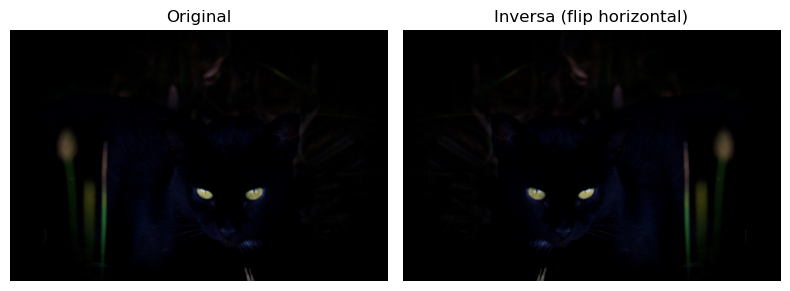

In [10]:
img4 = np.array(Image.open('imgs/gato.jpg'))
img4 = np.array(Image.fromarray(img4).resize(
    (img4.shape[1] // 10, img4.shape[0] // 10))
)

img4flip = img4[:, ::-1, :]

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img4)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img4flip)
plt.title('Inversa (flip horizontal)')
plt.axis('off')

plt.tight_layout()
plt.show()

## 1.11 Operadores aritméticos sobre imagens

Tal como no MATLAB, as operações aritméticas entre imagens são realizadas **elemento a elemento**,  
isto é, cada pixel é tratado como um valor numérico, independentemente do canal de cor.

No Python, estas operações são implementadas diretamente com `numpy`,  
onde as imagens são tratadas como matrizes multidimensionais.

| Função MATLAB | Equivalente em Python | Descrição |
|----------------|------------------------|------------|
| `imadd(A,B)` | `np.clip(A + B, 0, 255)` | Soma duas imagens (ou adiciona uma constante) |
| `imsubtract(A,B)` | `np.clip(A - B, 0, 255)` | Subtrai uma imagem ou constante |
| `immultiply(A,B)` | `np.clip(A * B, 0, 255)` | Multiplica elemento a elemento |
| `imdivide(A,B)` | `np.clip(A / (B + 1e-6), 0, 255)` | Divide elemento a elemento |
| `imabsdiff(A,B)` | `np.abs(A - B)` | Diferença absoluta |
| `imcomplement(A)` | `255 - A` | Complemento (inversão) da imagem |
| `imlincomb(a,A,b,B)` | `np.clip(a*A + b*B, 0, 255)` | Combinação linear de duas ou mais imagens |

> **Atenção ao tipo de dados:**  
> Em MATLAB, as funções `imxxx` mantêm o tipo `uint8` e fazem saturação automática.  
> No NumPy, o controlo deve ser feito manualmente com `np.clip()` para evitar *overflow*.

Em contexto de processamento digital de imagem, é comum efetuar estas operações  
para ajustar brilho, contraste, combinar canais ou calcular diferenças entre imagens consecutivas.

## 1.12 Operações aritméticas com controlo de tipo de dados

As operações aritméticas entre imagens podem ser realizadas diretamente sobre as matrizes `uint8`,
mas o resultado pode ser enganador devido à **saturação implícita** e ao **truncamento de inteiros**.

No exemplo seguinte, combinam-se duas imagens (`gato.jpg` e `maple.tif`) através de soma e multiplicação:

- **Soma (`imadd`)**  
  Soma elemento a elemento dos pixeis correspondentes, com saturação no limite de 255.  
  Em Python, a operação é feita com `np.clip(A + B, 0, 255)`.

- **Multiplicação (`immultiply`)**  
  A multiplicação direta de valores `uint8` não reflete a intensidade luminosa real,  
  pois os números inteiros [0–255] são tratados literalmente.  
  Assim, pixeis escuros (próximos de 0) reduzem demasiado o resultado,  
  e o produto entre cores resulta em áreas inesperadamente coloridas.

Para obter um resultado fisicamente coerente, convertem-se as matrizes para `float` no intervalo [0,1],
executa-se a multiplicação, e reconverte-se o resultado para `uint8`:

$$
I_{res} = \text{uint8}(255 \cdot (I_1 / 255) \times (I_2 / 255))
$$

Esta abordagem garante uma correspondência correta entre a operação matemática
e a intensidade visual percebida.

| Etapa | Tipo de dados | Intervalo | Efeito |
|--------|----------------|------------|---------|
| Operação direta (`uint8`) | inteiro sem sinal | 0–255 | truncagem e saturação |
| Conversão para `float` | ponto flutuante | 0–1 | operação contínua e precisa |
| Reconversão para `uint8` | inteiro sem sinal | 0–255 | restabelece gama original |

> **Resumo:**  
> As imagens devem ser tratadas como matrizes numéricas, mas o tipo de dados determina o resultado das operações.  
> Em processamento digital de imagem, converter para `float` antes de operar evita distorções causadas pela aritmética inteira.

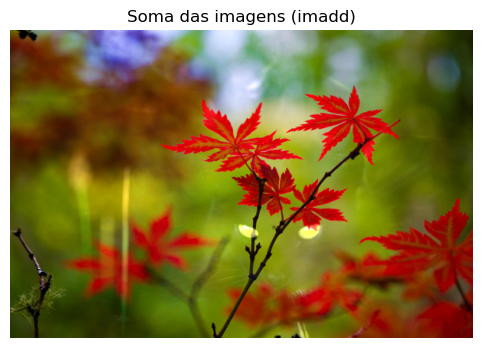

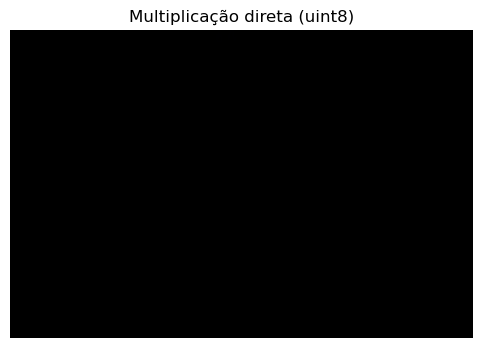

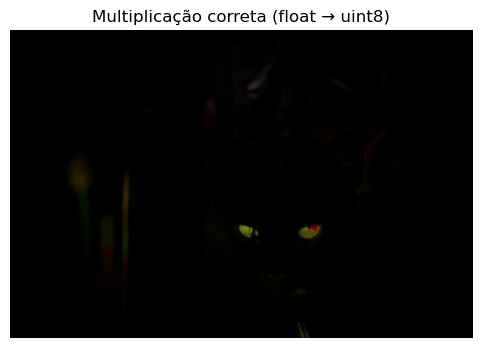

In [11]:
img4 = np.array(Image.open('imgs/gato.jpg'))
img4 = np.array(Image.fromarray(img4).resize((img4.shape[1] // 10, img4.shape[0] // 10)))

img5 = np.array(Image.open('imgs/maple.tif'))
img5 = np.array(Image.fromarray(img5).resize((img5.shape[1] // 10, img5.shape[0] // 10)))

soma = np.clip(img4.astype(np.uint16) + img5.astype(np.uint16), 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 4))
plt.imshow(soma)
plt.title('Soma das imagens (imadd)')
plt.axis('off')
plt.show()

mult_uint8 = np.clip(img4 * img5 / 255, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 4))
plt.imshow(mult_uint8)
plt.title('Multiplicação direta (uint8)')
plt.axis('off')
plt.show()

img4dbl = img4.astype(np.float64) / 255.0
img5dbl = img5.astype(np.float64) / 255.0
double_mult = img4dbl * img5dbl
double_uint = np.clip(double_mult * 255, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 4))
plt.imshow(double_uint)
plt.title('Multiplicação correta (float → uint8)')
plt.axis('off')
plt.show()

## 1.13 Operadores relacionais e lógicos

Os operadores relacionais podem ser aplicados diretamente às matrizes de imagem,
produzindo **imagens binárias** (valores 0 ou 1) que indicam onde a condição é verdadeira.

| Operador | Nome |
|-----------|-------|
| `<` | Menor que |
| `<=` | Menor ou igual a |
| `>` | Maior que |
| `>=` | Maior ou igual a |
| `==` | Igual a |
| `!=` | Diferente de |

Por exemplo:

- `img1 < 100` → seleciona pixeis **mais escuros** (valores baixos);  
- `img1 > 150` → seleciona pixeis **mais claros** (valores altos).

O resultado é uma matriz lógica com `True` (branco) e `False` (preto),
que pode ser visualizada diretamente com `imshow()`.

### 1.13.1 Máscaras lógicas

As **máscaras** são matrizes booleanas utilizadas para selecionar ou ocultar regiões da imagem.
Quando aplicadas a imagens a cores, a máscara deve ser replicada nos três canais:

```
mask_rgb = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
prod = img_rgb * mask_rgb
```

O resultado é uma imagem onde apenas os pixeis que cumprem a condição permanecem visíveis;
os restantes tornam-se negros (valor 0).

Estas operações permitem isolar regiões de interesse, segmentar objetos
ou combinar imagens com base em condições lógicas, constituindo a base
de muitas técnicas de processamento digital de imagem.

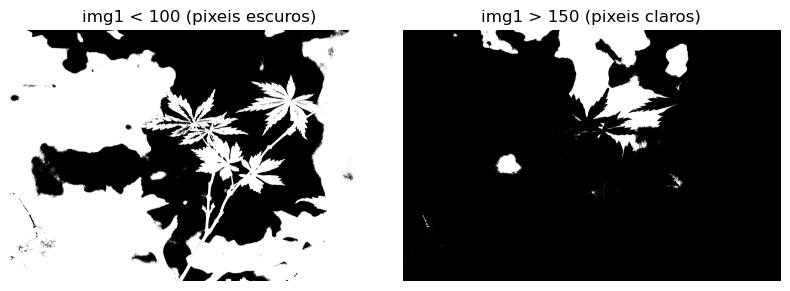

Submatriz da máscara (valores booleanos):
[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]]


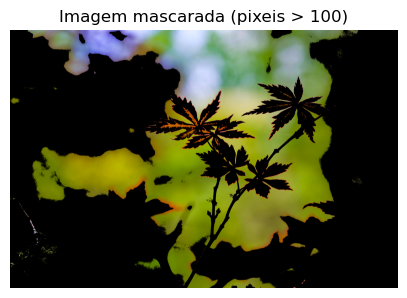

In [12]:
img1 = np.array(Image.open('imgs/maple.tif').convert('L'))

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img1 < 100, cmap='gray')
plt.title('img1 < 100 (pixeis escuros)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img1 > 150, cmap='gray')
plt.title('img1 > 150 (pixeis claros)')
plt.axis('off')

plt.tight_layout()
plt.show()

mask = img1 > 100
print("Submatriz da máscara (valores booleanos):")
print(mask[191:195, 300:304])

im5 = np.array(Image.open('imgs/maple.tif'))
maskee = im5.astype(np.float64) / 255.0

mask_rgb = np.repeat(mask[:, :, np.newaxis], 3, axis=2)

prod = maskee * mask_rgb

plt.figure(figsize=(5, 5))
plt.imshow((prod * 255).astype(np.uint8))
plt.title('Imagem mascarada (pixeis > 100)')
plt.axis('off')
plt.show()

## 1.14 Operadores lógicos e funções de agregação

Tal como em MATLAB, podemos combinar condições lógicas entre matrizes booleanas.
Os operadores lógicos são aplicados **elemento a elemento** e devolvem novas máscaras binárias.

| Símbolo MATLAB | Equivalente NumPy | Descrição |
|----------------|--------------------|------------|
| `&` | `np.logical_and(A, B)` | Verdadeiro se ambos forem verdadeiros |
| ` \| ` | `np.logical_or(A, B)` | Verdadeiro se um dos dois for verdadeiro |
| `~` | `np.logical_not(A)` | Inverte o valor lógico |
| `xor` | `np.logical_xor(A, B)` | Verdadeiro se forem diferentes |
| `all` | `np.all(A)` | Verdadeiro se todos os elementos forem não nulos |
| `any` | `np.any(A)` | Verdadeiro se algum elemento for não nulo |

Por exemplo:

- `np.logical_and(img1 < 100, img1 > 150)` → **não devolve nada**, pois as duas condições são mutuamente exclusivas;  
- `np.logical_or(img1 < 100, img1 > 150)` → seleciona pixeis **muito escuros ou muito claros**;  
- `np.logical_not(mask)` → inverte a seleção anterior;  
- `np.logical_xor(A, B)` → verdadeiro apenas onde as duas condições diferem.

As funções `np.all()` e `np.any()` não produzem imagens,  
mas **valores booleanos globais** que indicam se todos (ou algum) dos elementos
da matriz satisfazem uma condição.

Estas operações são fundamentais na **construção de máscaras compostas**  
e na implementação de critérios de segmentação em processamento digital de imagem.

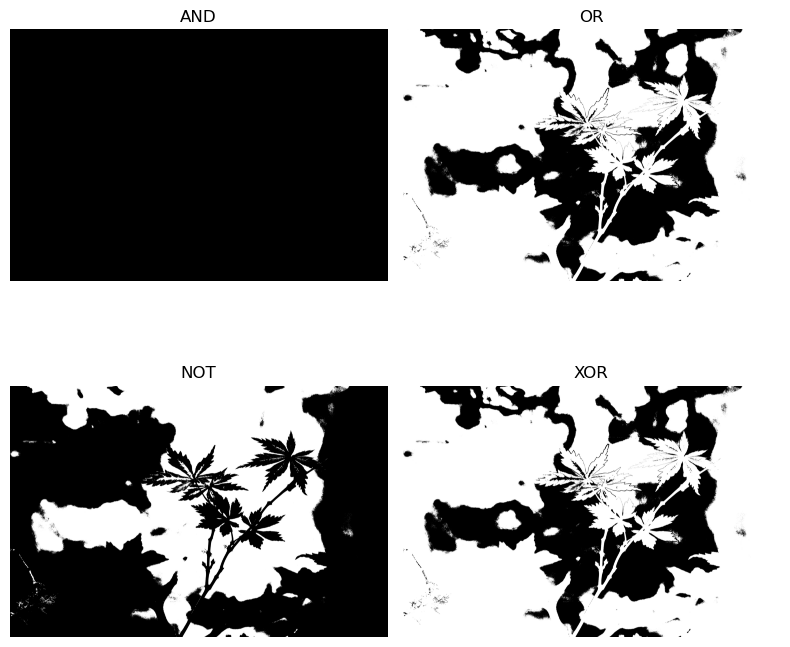

Todos > 0? False
Algum > 0? True


In [13]:
img1 = np.array(Image.open('imgs/maple.tif').convert('L'))

mask_dark = img1 < 100
mask_bright = img1 > 150

and_mask = np.logical_and(mask_dark, mask_bright)   # ambos verdadeiros
or_mask  = np.logical_or(mask_dark, mask_bright)    # qualquer um verdadeiro
not_mask = np.logical_not(mask_dark)                # negação
xor_mask = np.logical_xor(mask_dark, mask_bright)   # diferentes entre si

titles = ['AND', 'OR', 'NOT', 'XOR']
masks  = [and_mask, or_mask, not_mask, xor_mask]

plt.figure(figsize=(8, 8))
for i, (m, t) in enumerate(zip(masks, titles), 1):
    plt.subplot(2, 2, i)
    plt.imshow(m, cmap='gray')
    plt.title(t)
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Todos > 0?", np.all(img1))
print("Algum > 0?", np.any(img1))

## 1.15 Histogramas de intensidade

O **histograma** de uma imagem digital descreve a distribuição dos pixeis
em função dos seus níveis de intensidade.  
Se a imagem tiver \( L \) níveis possíveis (geralmente 256),
o histograma é a função discreta:

$$
h(i) = \text{número de pixeis com intensidade } i, \quad i \in [0, L-1]
$$

onde:
- \( i \) → nível de intensidade (0 = preto, 255 = branco),  
- \( h(i) \) → contagem de pixeis com esse valor.

Em Python, o histograma pode ser obtido diretamente com `numpy.histogram()`:

```
h, bins = np.histogram(im.flatten(), bins=256, range=[0,255])
```

ou através de funções gráficas como plt.hist() ou plt.fill_between() para visualização.

Os histogramas permitem identificar:

	•	imagens bem distribuídas, com intensidades espalhadas por toda a gama;
    
	•	imagens subexpostas, concentradas em valores baixos (tons escuros);
    
	•	imagens sobreexpostas, concentradas em valores altos (tons claros).

No exemplo, a imagem da folhagem apresenta uma distribuição equilibrada de intensidades,
enquanto a imagem do gato mostra um histograma concentrado nos valores mais baixos,
indicando predominância de pixeis escuros.

O histograma constitui, assim, uma ferramenta essencial para o estudo do contraste e da luminosidade de uma imagem.

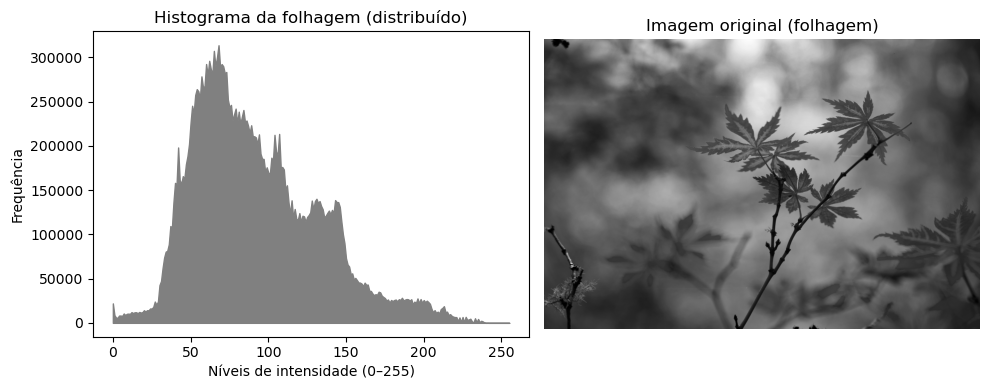

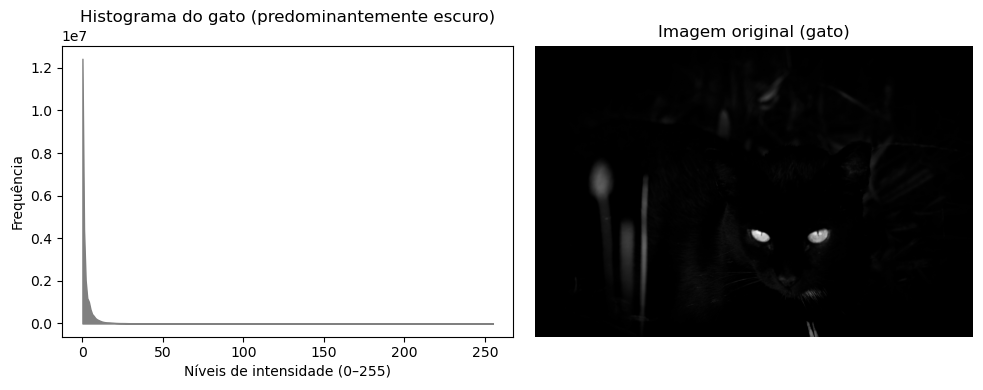

In [14]:
img1 = np.array(Image.open('imgs/maple.tif').convert('L'))   # imagem da folhagem (cinzento)
img4 = np.array(Image.open('imgs/gato.jpg').convert('L'))    # imagem do gato (convertida para cinzento)

h1, bins1 = np.histogram(img1.flatten(), bins=256, range=[0, 255])
h4, bins4 = np.histogram(img4.flatten(), bins=256, range=[0, 255])

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.fill_between(range(256), h1, color='gray')
plt.title('Histograma da folhagem (distribuído)')
plt.xlabel('Níveis de intensidade (0–255)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.imshow(img1, cmap='gray')
plt.title('Imagem original (folhagem)')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.fill_between(range(256), h4, color='gray')
plt.title('Histograma do gato (predominantemente escuro)')
plt.xlabel('Níveis de intensidade (0–255)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.imshow(img4, cmap='gray')
plt.title('Imagem original (gato)')
plt.axis('off')

plt.tight_layout()
plt.show()

## 1.16 Expansão de contraste (Linear Contrast Stretching)

Em muitas imagens, o histograma encontra-se **concentrado numa zona estreita**  
dos valores possíveis de intensidade, o que resulta num **baixo contraste** perceptual.

No exemplo seguinte (imagem do *pato*), observa-se que a maioria dos pixeis  
se encontra em torno do nível 150 — produzindo uma imagem visualmente “lavada”.

### 1.16.1 Passo 1 — Analisar o histograma
O histograma revela uma concentração no intervalo [90, 180],  
o que motiva a expansão linear desse intervalo para a gama total [0, 255].

### 1.16.2 Passo 2 — Aplicar o estiramento linear

A operação é dada por:

$$
I'(x,y) = \frac{255}{H - L} \cdot (I(x,y) - L)
$$

onde:
- \( L \) é o limite inferior (ex: 90),
- \( H \) é o limite superior (ex: 180).

Os valores resultantes são depois **recortados ao intervalo [0,255]**  
para evitar saturação fora da gama válida:

```
img6contrast[img6contrast < 0] = 0
img6contrast[img6contrast > 255] = 255
```


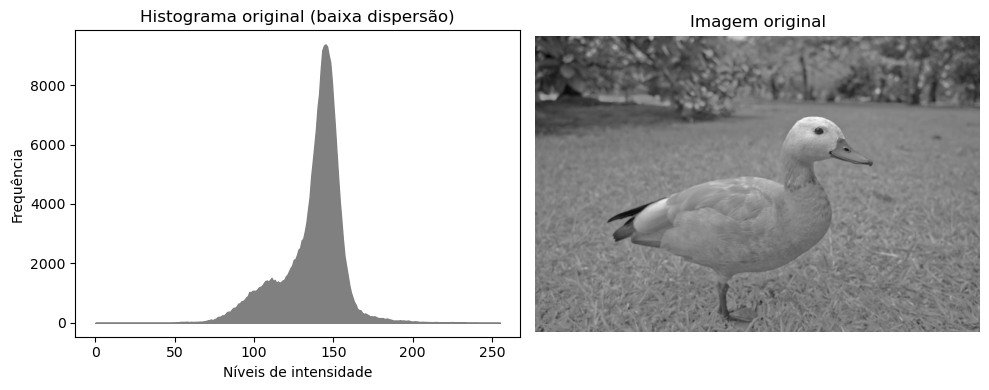

Valor mínimo: -130.33333333333334
Valor máximo: 427.83333333333337


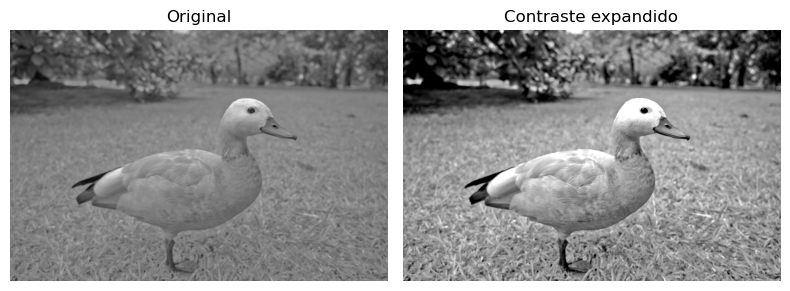

In [15]:
img6 = np.array(Image.open('imgs/duck.jpg').convert('L'))
img6 = np.array(Image.fromarray(img6).resize((img6.shape[1] // 10, img6.shape[0] // 10)))

h6, _ = np.histogram(img6.flatten(), bins=256, range=[0, 255])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.fill_between(range(256), h6, color='gray')
plt.title('Histograma original (baixa dispersão)')
plt.xlabel('Níveis de intensidade')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.imshow(img6, cmap='gray')
plt.title('Imagem original')
plt.axis('off')
plt.tight_layout()
plt.show()

low, high = 90, 180
img6contrast = 255 / (high - low) * (img6.astype(np.float64) - low)

print("Valor mínimo:", np.min(img6contrast))
print("Valor máximo:", np.max(img6contrast))

img6contrast[img6contrast < 0] = 0
img6contrast[img6contrast > 255] = 255
img6contrast = img6contrast.astype(np.uint8)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img6, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img6contrast, cmap='gray')
plt.title('Contraste expandido')
plt.axis('off')

plt.tight_layout()
plt.show()

## 1.17 Equalização de histograma

Uma alternativa ao estiramento linear é a **equalização de histograma**,  
em que o objetivo é redistribuir os níveis de cinzento de modo a que todos  
os intervalos de intensidade fiquem **aproximadamente equilibrados**.

O resultado é uma imagem com **contraste global melhorado**,  
particularmente nas regiões originalmente comprimidas em poucas intensidades.

### 1.17.1 Função equivalente em Python

A função `exposure.equalize_hist()` da biblioteca **scikit-image** é o equivalente direto da `histeq()` do MATLAB.  
Ela calcula a **transformação cumulativa** dos valores de intensidade e remapeia os pixeis para uma nova distribuição:

```
from skimage import exposure
im_eq = exposure.equalize_hist(im)
```

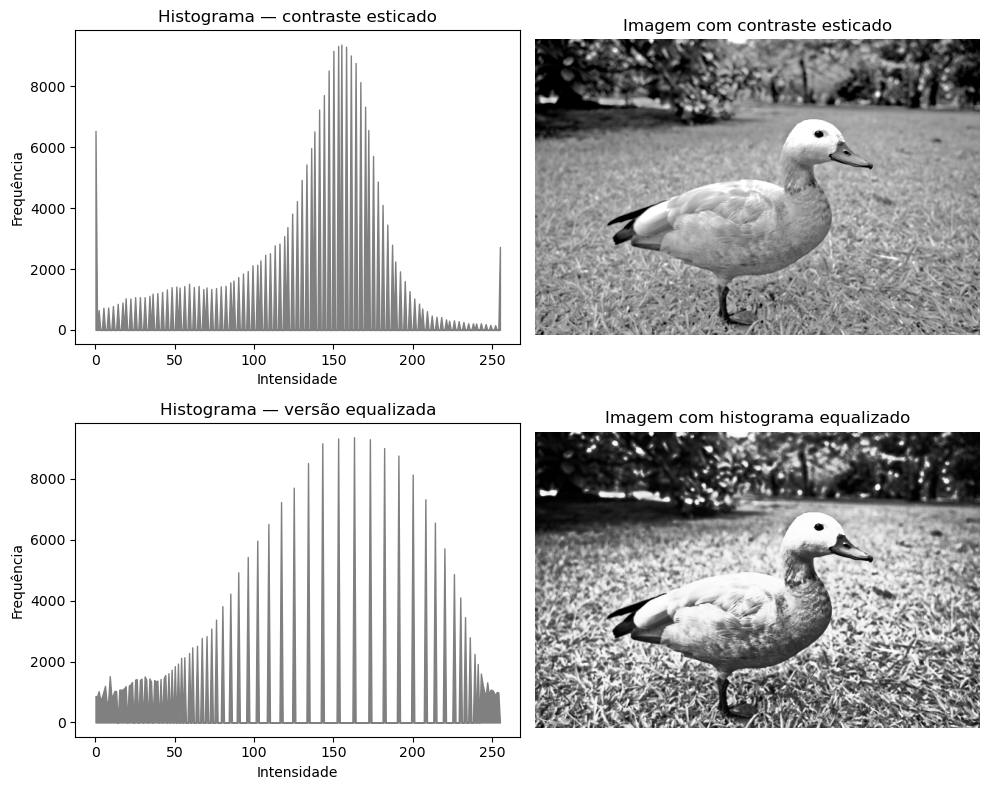

In [16]:
img6 = np.array(Image.open('imgs/duck.jpg').convert('L'))
img6 = np.array(Image.fromarray(img6).resize((img6.shape[1] // 10, img6.shape[0] // 10)))

low, high = 90, 180
img6contrast = 255 / (high - low) * (img6.astype(np.float64) - low)
img6contrast = np.clip(img6contrast, 0, 255).astype(np.uint8)

img6histeq = exposure.equalize_hist(img6)         # devolve float64 em [0,1]
img6histeq = (img6histeq * 255).astype(np.uint8)  # converter para uint8

h_contrast, _ = np.histogram(img6contrast.flatten(), bins=256, range=[0, 255])
h_eq, _ = np.histogram(img6histeq.flatten(), bins=256, range=[0, 255])

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.fill_between(range(256), h_contrast, color='gray')
plt.title('Histograma — contraste esticado')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')

plt.subplot(2, 2, 2)
plt.imshow(img6contrast, cmap='gray')
plt.title('Imagem com contraste esticado')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.fill_between(range(256), h_eq, color='gray')
plt.title('Histograma — versão equalizada')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')

plt.subplot(2, 2, 4)
plt.imshow(img6histeq, cmap='gray')
plt.title('Imagem com histograma equalizado')
plt.axis('off')

plt.tight_layout()
plt.show()

## 1.18 Ajuste de histograma (Histogram Matching)

Uma outra operação útil consiste em **ajustar o histograma de uma imagem**  
para que este se assemelhe ao de uma **imagem de referência**.

Este processo, designado *histogram matching* (ou *histogram specification*),  
não recria a imagem de referência, mas **adapta a distribuição tonal**  
para produzir um contraste semelhante ao da imagem-alvo.

### 1.18.1 Implementação em Python

A biblioteca `scikit-image` fornece a função `match_histograms()`, equivalente a `imhistmatch()` do MATLAB:

```
from skimage import exposure
im_matched = exposure.match_histograms(im_source, im_reference)
```

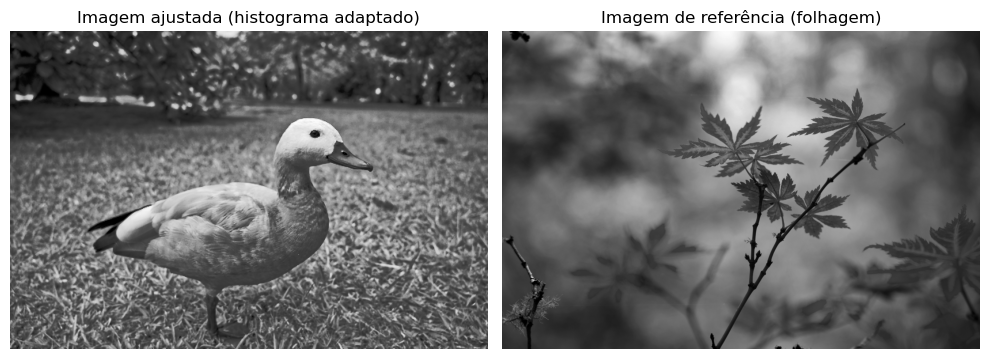

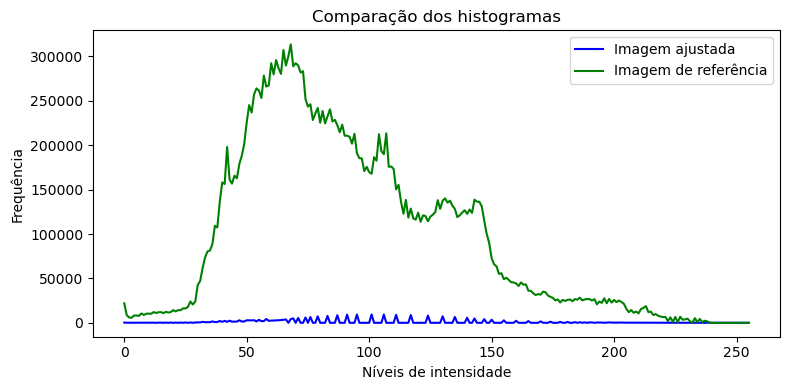

In [17]:
img6 = np.array(Image.open('imgs/duck.jpg').convert('L'))
img6 = np.array(Image.fromarray(img6).resize((img6.shape[1] // 10, img6.shape[0] // 10)))

img1 = np.array(Image.open('imgs/maple.tif').convert('L'))  # imagem de referência (folhagem)

img6histref = exposure.match_histograms(img6, img1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img6histref, cmap='gray')
plt.title('Imagem ajustada (histograma adaptado)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img1, cmap='gray')
plt.title('Imagem de referência (folhagem)')
plt.axis('off')

plt.tight_layout()
plt.show()

h_target, _ = np.histogram(img6histref.flatten(), bins=256, range=[0, 255])
h_ref, _ = np.histogram(img1.flatten(), bins=256, range=[0, 255])

plt.figure(figsize=(8, 4))
plt.plot(h_target, label='Imagem ajustada', color='blue')
plt.plot(h_ref, label='Imagem de referência', color='green')
plt.title('Comparação dos histogramas')
plt.xlabel('Níveis de intensidade')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()

## 1.19 Negativo de uma imagem (complemento de intensidade)

O **negativo** de uma imagem é obtido invertendo os valores de intensidade de cada pixel:
pixeis escuros tornam-se claros e vice-versa.

Matematicamente, o negativo \( I_n \) é dado por:

$$
I_n(x,y) = 255 - I(x,y)
$$

onde \( I(x,y) \) é a intensidade original e 255 o valor máximo (para 8 bits).

### 1.19.1 Nível matricial (abordagem algébrica)
Em `numpy`, o negativo é simplesmente a subtração direta

Esta operação é vetorizada e aplica-se de forma idêntica
a imagens em tons de cinzento (2D) e a cores RGB (3D).

### 1.19.2 Nível de biblioteca (abordagem simbólica)
A biblioteca Pillow oferece uma alternativa semântica através de:

```
from PIL import ImageOps
neg = ImageOps.invert(im)
```

Esta função realiza o mesmo cálculo, mas deteta automaticamente o modo da imagem (L, RGB, etc.).

### 1.19.3 Interpretação

| Tipo de Imagem | Operação | Resultado |
|----------------|-----------|------------|
| **Tons de cinzento** | `255 - im` | inverte luminosidade |
| **RGB** | `255 - im[:,:,c]` para cada canal | inverte cada componente de cor |
| **Pillow (`ImageOps.invert`)** | automática | mesmo resultado, forma simbólica |

O negativo é útil tanto como operação estética como para análise técnica,
por exemplo, para realçar pormenores em regiões escuras ou preparar transformações inversas.

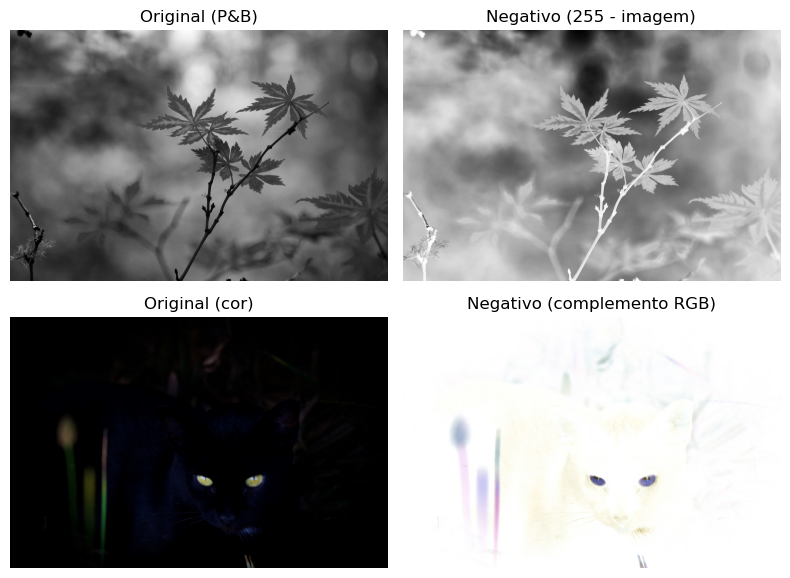

Negativo P&B idêntico entre métodos?  True
Negativo cor idêntico entre métodos?  True


In [18]:
img_gray = np.array(Image.open('imgs/maple.tif').convert('L'))

img_color = np.array(Image.open('imgs/gato.jpg'))

neg_gray = 255 - img_gray
neg_color = 255 - img_color

neg_gray_pil = np.array(ImageOps.invert(Image.fromarray(img_gray)))
neg_color_pil = np.array(ImageOps.invert(Image.fromarray(img_color)))

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0, 0].imshow(img_gray, cmap='gray')
axs[0, 0].set_title('Original (P&B)')
axs[0, 0].axis('off')

axs[0, 1].imshow(neg_gray, cmap='gray')
axs[0, 1].set_title('Negativo (255 - imagem)')
axs[0, 1].axis('off')

axs[1, 0].imshow(img_color)
axs[1, 0].set_title('Original (cor)')
axs[1, 0].axis('off')

axs[1, 1].imshow(neg_color)
axs[1, 1].set_title('Negativo (complemento RGB)')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("Negativo P&B idêntico entre métodos? ", np.array_equal(neg_gray, neg_gray_pil))
print("Negativo cor idêntico entre métodos? ", np.array_equal(neg_color, neg_color_pil))

## 1.20 Transformações de intensidade

Uma **transformação de intensidade** define uma função \( T \) que relaciona
o valor de intensidade de entrada \( f(x,y) \) com o de saída \( g(x,y) \):

$$
g(x,y) = T(f(x,y))
$$

No MATLAB, esta operação é realizada pela função `imadjust(f, [low_in high_in], [low_out high_out], gamma)`.  
Em Python, utilizamos funções da biblioteca `skimage.exposure` para o mesmo efeito.

---

### 1.20.1 Negativo da imagem

O negativo é obtido invertendo a relação entre valores baixos e altos de intensidade:

```
out_neg = exposure.rescale_intensity(im, in_range=(0,1), out_range=(1,0))
```

Esta operação corresponde ao mapeamento [0,1] → [1,0],
ou seja, transforma preto em branco e vice-versa.

### 1.20.2 Expansão de contraste com correção gama

A correção gama controla a curvatura da transformação de intensidade:

$$
g = f^\gamma
$$

	•	γ < 1 → realça as regiões claras (aumenta os highlights);
	•	γ = 1 → transformação linear (sem alteração);
	•	γ > 1 → realça as regiões escuras (aumenta as shadows).
    
### 1.20.3 Ajustes diretos de brilho e exposição

Duas transformações simples de intensidade são a multiplicação (mudança de exposição)
e a soma (mudança de brilho):

| Transformação | Operação | Efeito |
|----------------|-----------|--------|
| **Reduzir exposição** | `im * 0.5` | torna a imagem mais escura |
| **Aumentar brilho** | `im + 50` | desloca todas as intensidades para cima |

### 1.20.4 Interpretação visual da correção gama

| Situação | Valor de γ | Efeito visual |
|-----------|-------------|----------------|
| **γ < 1** | curva côncava | realce de zonas claras |
| **γ = 1** | linear | intensidade inalterada |
| **γ > 1** | curva convexa | realce de zonas escuras |

Estas transformações constituem a base de correções fotográficas e tonais,
e são fundamentais para compreender ajustes não lineares de intensidade.


Adotamos um pipeline numérico **float em `[0,1]`**:
- leitura → normalização para `[0,1]`;
- operações (negativo, rescale, gamma, brilho/exposição);
- visualização direta em `matplotlib` (que aceita floats).

**Exemplos:**
- **Negativo:** `1 - I`
- **Expansão + gamma (highlights):**
  1) `rescale_intensity(I, in_range=(0.2,0.8))`  
  2) `adjust_gamma(..., gamma=0.5)`
- **Expansão + gamma (shadows):** igual, mas `gamma=1.5`
- **Exposição (escala):** `clip(I * 0.5, 0, 1)`
- **Brilho (offset):** `clip(I + 50/255, 0, 1)`

> **Regras de ouro (muito importante)**
>
> 1. Para funções de `skimage.exposure`, **trabalha em `float` `[0,1]`**.  
> 2. Se precisares de `uint8` para guardar/compatibilizar, **converte no fim**:  
>    `im_u8 = (np.clip(I, 0, 1) * 255).round().astype(np.uint8)`.  
> 3. Em operações puras `numpy` com imagens `uint8`, usa `np.clip` para evitar **overflow**.  
> 4. Mantém a semântica: multiplicação = **exposição**; soma = **brilho**; `gamma` = **curvatura**.

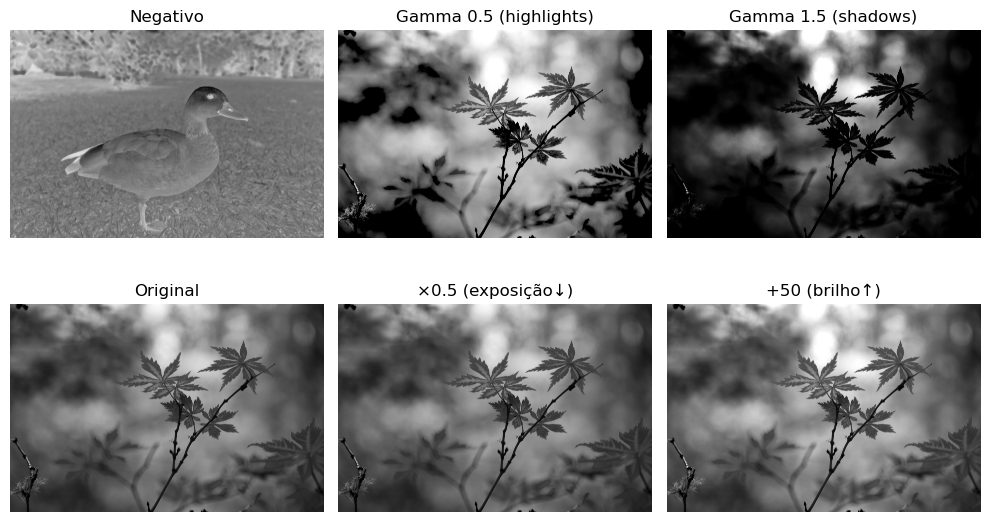

In [19]:
img1 = np.array(Image.open('imgs/maple.tif').convert('L'), dtype=np.float32) / 255.0
img2 = np.array(Image.open('imgs/duck.jpg').convert('L'),  dtype=np.float32) / 255.0

neg = 1.0 - img2

hi = exposure.rescale_intensity(img1, in_range=(0.2, 0.8), out_range=(0, 1))
hi = exposure.adjust_gamma(hi, gamma=0.5)

lo = exposure.rescale_intensity(img1, in_range=(0.2, 0.8), out_range=(0, 1))
lo = exposure.adjust_gamma(lo, gamma=1.5)

darker   = np.clip(img1 * 0.5, 0.0, 1.0)           # ×0.5
brighter = np.clip(img1 + (50/255.0), 0.0, 1.0)    # +50 (convertido para float)

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs[0,0].imshow(neg, cmap='gray'); axs[0,0].set_title('Negativo'); axs[0,0].axis('off')
axs[0,1].imshow(hi,  cmap='gray'); axs[0,1].set_title('Gamma 0.5 (highlights)'); axs[0,1].axis('off')
axs[0,2].imshow(lo,  cmap='gray'); axs[0,2].set_title('Gamma 1.5 (shadows)');    axs[0,2].axis('off')
axs[1,0].imshow(img1, cmap='gray'); axs[1,0].set_title('Original'); axs[1,0].axis('off')
axs[1,1].imshow(darker,   cmap='gray'); axs[1,1].set_title('×0.5 (exposição↓)'); axs[1,1].axis('off')
axs[1,2].imshow(brighter, cmap='gray'); axs[1,2].set_title('+50 (brilho↑)');     axs[1,2].axis('off')
plt.tight_layout(); plt.show()

## 1.21 Geração de imagens a partir de matrizes

Até agora trabalhámos com imagens importadas, mas é igualmente possível gerar **imagens sintéticas** a partir de operações matriciais — úteis, por exemplo, para criar **máscaras**, **padrões de teste** ou **gradientes de intensidade**.

### 1.21.1 Gradiente horizontal  
Usando `linspace` e `tile`, criamos uma matriz de 400×400 pixeis onde a intensidade varia linearmente de 0 (preto) a 255 (branco) ao longo das colunas:  
→ `gradient = np.linspace(0, 255, 400)`  
→ `gradient = np.tile(gradient, (400, 1))`

### 1.21.2 Gradiente vertical  
A transposta da matriz (`gradient.T`) inverte a direção do gradiente, criando uma variação vertical das intensidades.

### 1.21.3 Malha linear  
Podemos combinar dois gradientes — um horizontal e outro vertical — para formar uma superfície 2D:  
→ `I(x,y) = (x + y) / 2`  
A imagem resultante é um **gradiente bidimensional** em tons médios.

### 1.21.4 Malha sinusoidal
Aplicando uma função não linear (por exemplo, `sin`) antes da combinação, obtemos uma malha com variação suave e ondulante:  
→ `I(x,y) = (sin(x) + sin(y)) / 2`

| Tipo de padrão | Expressão | Efeito visual |
|----------------|------------|----------------|
| Gradiente horizontal | `np.tile(np.linspace(0,255,400), (400,1))` | variação esquerda→direita |
| Gradiente vertical | `gradient.T` | variação cima→baixo |
| Malha linear | `(x + y) / 2` | plano inclinado 2D |
| Malha senoidal | `(sin(x) + sin(y)) / 2` | relevo ondulado |

**Nota didática:**  
Estas imagens são puramente algébricas, e cada pixel resulta de uma expressão matemática.  
Tornam-se, assim, ferramentas fundamentais para testar **filtros, máscaras e transformações geométricas**.

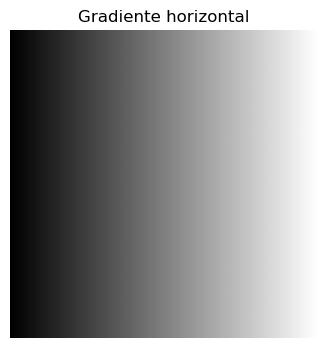

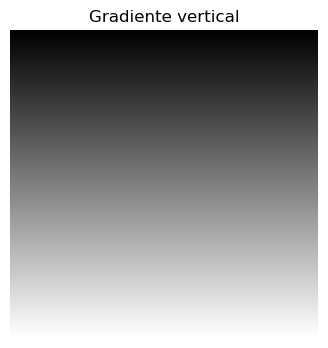

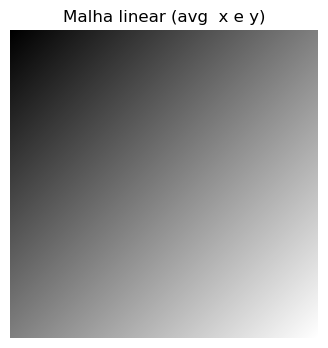

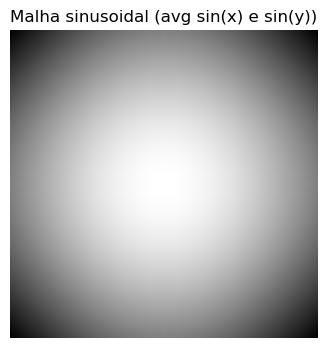

In [20]:
gradient = np.linspace(0, 255, 400, dtype=np.float32)
gradient = np.tile(gradient, (400, 1))  # repete a linha 400x
plt.figure(figsize=(4, 4))
plt.imshow(gradient, cmap='gray', vmin=0, vmax=255)
plt.title('Gradiente horizontal')
plt.axis('off')
plt.show()

gradient_T = gradient.T
plt.figure(figsize=(4, 4))
plt.imshow(gradient_T, cmap='gray', vmin=0, vmax=255)
plt.title('Gradiente vertical')
plt.axis('off')
plt.show()

x = np.linspace(0, 1, 400)
x = np.tile(x, (400, 1))
y = x.T
mesh = (x + y) / 2

plt.figure(figsize=(4, 4))
plt.imshow(mesh, cmap='gray', vmin=0, vmax=1)
plt.title('Malha linear (avg  x e y)')
plt.axis('off')
plt.show()

x = np.sin(np.linspace(0, 1, 400) * np.pi)
x = np.tile(x, (400, 1))
y = x.T
mesh_sin = (x + y) / 2

plt.figure(figsize=(4, 4))
plt.imshow(mesh_sin, cmap='gray', vmin=0, vmax=1)
plt.title('Malha sinusoidal (avg sin(x) e sin(y))')
plt.axis('off')
plt.show()

## 1.22 Canais de cor e espaço RGB

As imagens digitais são geralmente representadas no espaço **RGB**,  
em que cada cor é uma combinação linear de três canais:  
**R (vermelho)**, **G (verde)** e **B (azul)**.

Cada pixel é, portanto, um vetor tridimensional `[R, G, B]`,  
e visualizar separadamente os canais permite compreender como a cor global é construída.

### 1.22.1 Visualização dos canais em escala de cinzento  
Cada canal isolado mostra a **intensidade** do seu componente cromático:  
- canal vermelho → regiões dominadas por tons quentes;  
- canal verde → zonas médias e neutras;  
- canal azul → sombras e tons frios.

### 1.22.2 Visualização dos canais na sua cor original  
Podemos tornar visível a contribuição de cada canal  
mantendo apenas um ativo e anulando os outros dois:  
- vermelho: `[R, 0, 0]`  
- verde: `[0, G, 0]`  
- azul: `[0, 0, B]`

### 1.22.3 Gradientes entre pares de canais  
Combinando dois canais e anulando o terceiro, obtemos planos bidimensionais do espaço RGB:  

| Combinação | Descrição | Eixo anulado |
|-------------|------------|---------------|
| **R–G** | mistura entre vermelho e verde (tons de amarelo) | azul |
| **G–B** | mistura entre verde e azul (tons de ciano) | vermelho |
| **B–R** | mistura entre azul e vermelho (tons de magenta) | verde |

### 1.22.4 O cubo RGB  
Cada eixo do espaço tridimensional representa um canal de cor,  
e cada vértice corresponde a uma cor primária ou secundária.  
A diagonal de `[0,0,0]` a `[255,255,255]` representa a escala de cinzento.

**Nota didática:**  
Compreender o espaço RGB como um cubo permite visualizar a **geometria da cor**:  
as cores são pontos neste espaço, e as suas distâncias representam diferenças cromáticas.  
Esta geometria é a base para transformações posteriores, como o espaço **HSV**,  
que descreve a cor em termos de **tom (Hue)**, **saturação (Saturation)** e **luminância (Value)**.

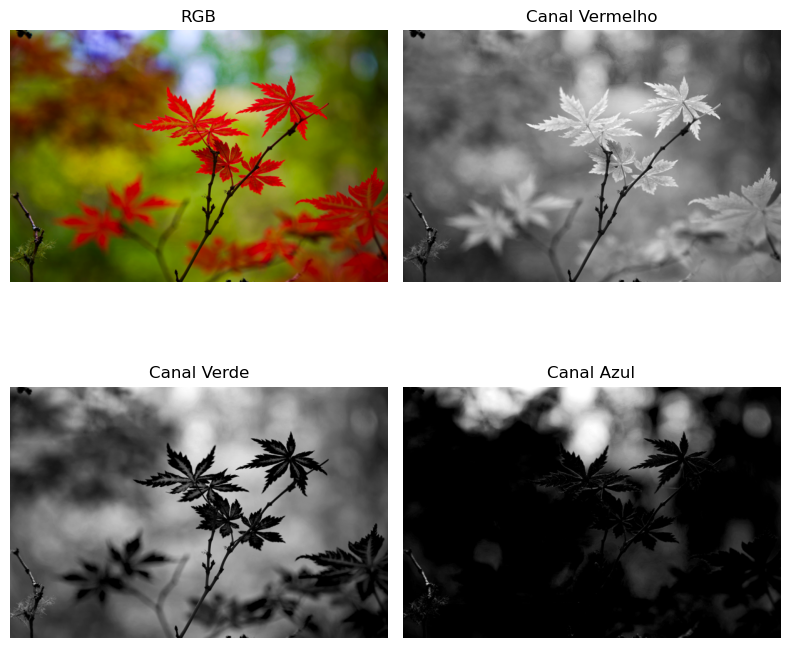

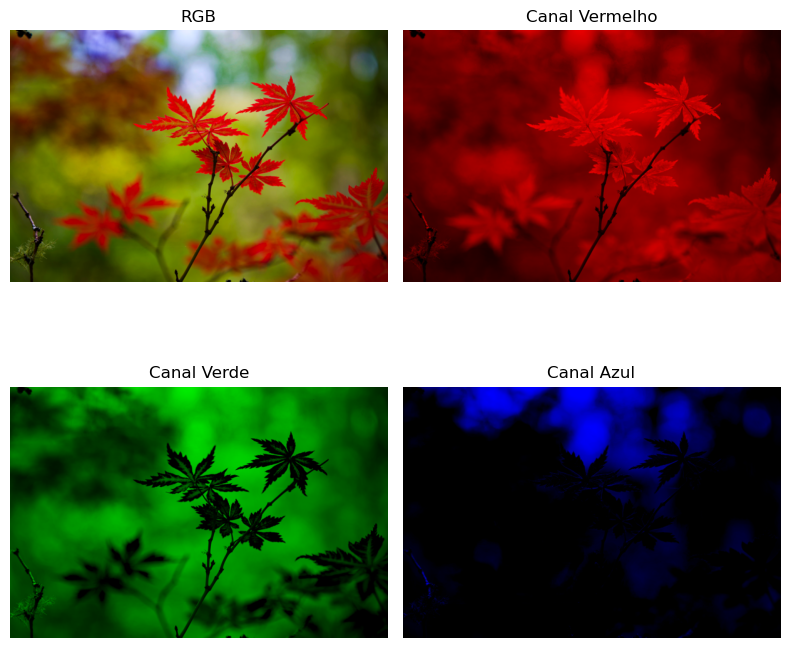

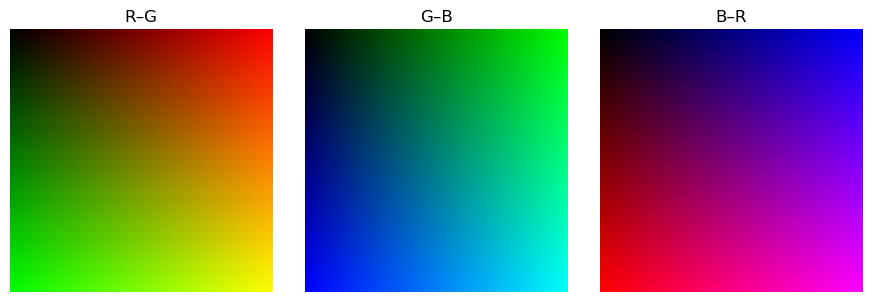

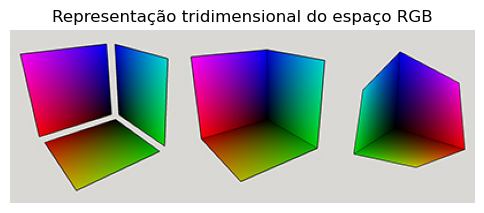

In [21]:
img7 = np.array(Image.open('imgs/maple.tif'))
img7 = np.array(Image.fromarray(img7).resize((img7.shape[1] // 10, img7.shape[0] // 10)))

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img7)
plt.title('RGB'); plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img7[:, :, 0], cmap='gray')
plt.title('Canal Vermelho'); plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img7[:, :, 1], cmap='gray')
plt.title('Canal Verde'); plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img7[:, :, 2], cmap='gray')
plt.title('Canal Azul'); plt.axis('off')

plt.tight_layout(); plt.show()

red   = np.zeros_like(img7); red[:, :, 0] = img7[:, :, 0]
green = np.zeros_like(img7); green[:, :, 1] = img7[:, :, 1]
blue  = np.zeros_like(img7); blue[:, :, 2] = img7[:, :, 2]

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1); plt.imshow(img7); plt.title('RGB'); plt.axis('off')
plt.subplot(2, 2, 2); plt.imshow(red); plt.title('Canal Vermelho'); plt.axis('off')
plt.subplot(2, 2, 3); plt.imshow(green); plt.title('Canal Verde'); plt.axis('off')
plt.subplot(2, 2, 4); plt.imshow(blue); plt.title('Canal Azul'); plt.axis('off')
plt.tight_layout(); plt.show()

gradient = np.linspace(0, 255, 400, dtype=np.uint8)
gradientH = np.tile(gradient, (400, 1))
gradientV = gradientH.T

gradientRG = np.stack([gradientH, gradientV, np.zeros((400, 400), np.uint8)], axis=2)
gradientGB = np.stack([np.zeros((400, 400), np.uint8), gradientH, gradientV], axis=2)
gradientBR = np.stack([gradientV, np.zeros((400, 400), np.uint8), gradientH], axis=2)

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1); plt.imshow(gradientRG); plt.title('R–G'); plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(gradientGB); plt.title('G–B'); plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(gradientBR); plt.title('B–R'); plt.axis('off')
plt.tight_layout(); plt.show()

rgbCube = np.array(Image.open('imgs/rgbCube.jpg'))
plt.figure(figsize=(6, 3))
plt.imshow(rgbCube)
plt.title('Representação tridimensional do espaço RGB')
plt.axis('off')
plt.show()

## 1.23 Conversão entre espaços de cor: HSV e RGB

O MATLAB oferece as funções `rgb2hsv` e `hsv2rgb`  
para converter automaticamente entre o espaço **RGB** (aditivo)  
e o espaço **HSV** (Hue, Saturation, Value).

Em Python, o mesmo pode ser feito através de `matplotlib.colors.hsv_to_rgb()`.

### 1.23.1 Estrutura do espaço HSV

- **Hue (H)** — tom, varia de 0 a 1 (ou 0° a 360°); define a cor base.  
- **Saturation (S)** — saturação, de 0 (acinzentado) a 1 (puro).  
- **Value (V)** — valor ou luminosidade, de 0 (preto) a 1 (branco).

### 1.23.2 Experiência visual

Criando uma matriz HSV onde:
- o **Hue (H)** varia horizontalmente de 0 a 1,  
- o **Value (V)** varia verticalmente de 0 a 1,  
- a **Saturação (S)** é constante (1),

obtemos um **mapa contínuo de cor** onde as tonalidades percorrem o círculo cromático,  
e a luminosidade diminui de cima para baixo.

| Canal | Intervalo | Efeito visual |
|--------|-------------|----------------|
| **Hue (H)** | 0 → 1 | sequência de cores (vermelho → verde → azul → vermelho) |
| **Saturation (S)** | 0 → 1 | intensidade da cor (cinzento → cor pura) |
| **Value (V)** | 0 → 1 | brilho da cor (preto → cor total) |

**Nota didática:**  
O espaço HSV é mais **perceptualmente uniforme** do que o RGB,  
e aproxima-se da forma como o ser humano percebe variações de cor.  
É especialmente útil em tarefas de **segmentação**, **ajuste cromático** e **seleção interativa de cor**.

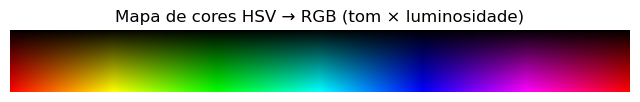

In [22]:
H = np.linspace(0, 1, 1000)
H = np.tile(H, (100, 1))          # 100 linhas, 1000 colunas → variação horizontal do tom
S = np.ones_like(H)               # saturação máxima
V = np.linspace(0, 1, 100)[:, None]  # variação vertical da luminosidade
V = np.tile(V, (1, 1000))

HSV = np.stack([H, S, V], axis=2)  # concatena nos 3 canais (H, S, V)

RGB = colors.hsv_to_rgb(HSV)

plt.figure(figsize=(8, 3))
plt.imshow(RGB)
plt.title('Mapa de cores HSV → RGB (tom × luminosidade)')
plt.axis('off')
plt.show()

## 1.24 Implementação manual da conversão RGB ↔ HSV

Para compreender profundamente o funcionamento da conversão de espaços de cor,  
podemos implementar manualmente o processo **RGB → HSV → RGB**,  
sem recorrer a funções de biblioteca.

### 1.24.1 Decomposição e normalização
Cada canal (R, G, B) é extraído da imagem e convertido para valores reais entre 0 e 1:
- \( R, G, B \in [0,1] \)
- \( c_{max} = \max(R, G, B) \)
- \( c_{min} = \min(R, G, B) \)
- \( \text{chroma} = c_{max} - c_{min} \)

### 1.24.2 Cálculo do Hue (H)
O tom (Hue) depende de qual canal domina a cor:

$$
H =
\begin{cases}
60 \cdot \frac{G - B}{\text{chroma}} & \text{se } c_{max} = R \\
60 \cdot \frac{B - R}{\text{chroma}} + 120 & \text{se } c_{max} = G \\
60 \cdot \frac{R - G}{\text{chroma}} + 240 & \text{se } c_{max} = B
\end{cases}
$$

com normalização para o intervalo [0°, 360°).


### 1.24.3  Cálculo de Saturation (S) e Value (V)

$$
S =
\begin{cases}
0 & \text{se } c_{max} = 0 \\
\frac{\text{chroma}}{c_{max}} & \text{caso contrário}
\end{cases},
\quad
V = c_{max}
$$


### 1.24.4 Reconversão HSV → RGB
Definimos:

$$
C = V \cdot S,\quad
X = C \cdot \left(1 - |(H/60) \bmod 2 - 1|\right),\quad
m = V - C
$$

Dependendo do setor de \( H \), selecionamos a combinação adequada de (R′, G′, B′):  

| Setor | Intervalo H (°) | (R′, G′, B′) |
|--------|-----------------|----------------|
| 0 | [0°, 60°) | (C, X, 0) |
| 1 | [60°, 120°) | (X, C, 0) |
| 2 | [120°, 180°) | (0, C, X) |
| 3 | [180°, 240°) | (0, X, C) |
| 4 | [240°, 300°) | (X, 0, C) |
| 5 | [300°, 360°) | (C, 0, X) |

Por fim:
$$
R = (R′ + m) \times 255,\quad G = (G′ + m) \times 255,\quad B = (B′ + m) \times 255
$$

### 1.24.5 Verificação
As diferenças entre os canais reconvertidos e os originais são visualizadas em escala de cinzento,  
confirmando a **fidelidade numérica da reconversão**.

**Nota didática:**  
Este exercício permite observar que as conversões entre RGB e HSV  
são **não lineares e dependentes de condições de máximo e mínimo por pixel**.  
Implementar o processo manualmente reforça a compreensão dos espaços de cor  
e o modo como pequenas variações podem afetar a tonalidade e saturação.

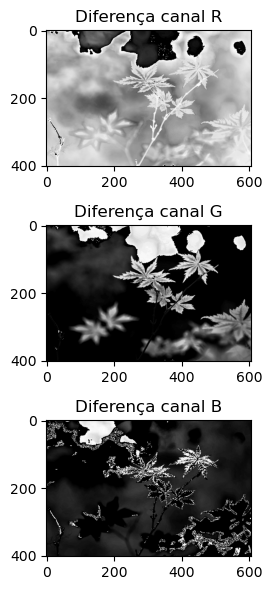

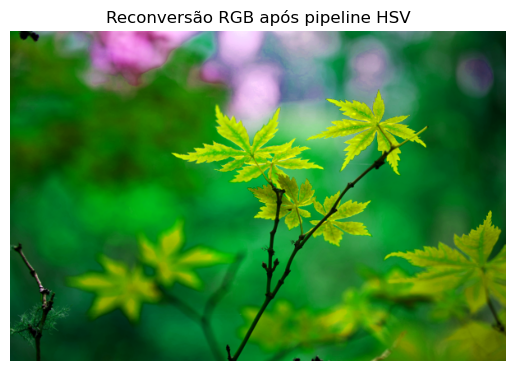

In [29]:
im7 = np.array(Image.open('imgs/maple.tif'))
im7 = np.array(Image.fromarray(im7).resize((im7.shape[1] // 10, im7.shape[0] // 10)))

proc = im7.astype(np.float64) / 255.0
R, G, B = proc[:, :, 0], proc[:, :, 1], proc[:, :, 2]

cMax = np.max(proc, axis=2)
cMin = np.min(proc, axis=2)
chroma = cMax - cMin

h = np.zeros_like(cMax)
mask = chroma != 0

cond = (cMax == R) & mask
h[cond] = (60 * ((G[cond] - B[cond]) / chroma[cond])) % 360
cond = (cMax == G) & mask
h[cond] = (60 * ((B[cond] - R[cond]) / chroma[cond]) + 120) % 360
cond = (cMax == B) & mask
h[cond] = (60 * ((R[cond] - G[cond]) / chroma[cond]) + 240) % 360

h = (h + 70) % 360

s = np.zeros_like(cMax)
s[cMax != 0] = chroma[cMax != 0] / cMax[cMax != 0]
v = cMax

C = v * s
X = C * (1 - np.abs((h / 60) % 2 - 1))
m = v - C

Rprov = np.zeros_like(h)
Gprov = np.zeros_like(h)
Bprov = np.zeros_like(h)

Hsector = np.floor(h / 60).astype(int)

for k in range(6):
    mask = Hsector == k
    if k == 0:
        Rprov[mask], Gprov[mask], Bprov[mask] = C[mask], X[mask], 0
    elif k == 1:
        Rprov[mask], Gprov[mask], Bprov[mask] = X[mask], C[mask], 0
    elif k == 2:
        Rprov[mask], Gprov[mask], Bprov[mask] = 0, C[mask], X[mask]
    elif k == 3:
        Rprov[mask], Gprov[mask], Bprov[mask] = 0, X[mask], C[mask]
    elif k == 4:
        Rprov[mask], Gprov[mask], Bprov[mask] = X[mask], 0, C[mask]
    elif k == 5:
        Rprov[mask], Gprov[mask], Bprov[mask] = C[mask], 0, X[mask]

Rout = np.uint8((Rprov + m) * 255)
Gout = np.uint8((Gprov + m) * 255)
Bout = np.uint8((Bprov + m) * 255)
postConversion = np.stack([Rout, Gout, Bout], axis=2)

plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.imshow(np.abs(Rout - im7[:, :, 0]), cmap='gray'); plt.title('Diferença canal R')
plt.subplot(3, 1, 2)
plt.imshow(np.abs(Gout - im7[:, :, 1]), cmap='gray'); plt.title('Diferença canal G')
plt.subplot(3, 1, 3)
plt.imshow(np.abs(Bout - im7[:, :, 2]), cmap='gray'); plt.title('Diferença canal B')
plt.tight_layout()
plt.show()

plt.figure()
plt.imshow(postConversion)
plt.title('Reconversão RGB após pipeline HSV')
plt.axis('off')
plt.show()